# Cognitive Geometry Paper
## Figure 1
## $\beta = 100$
 Demonstrate Value function, optimal policy, Decision Information and free energy optimal policy with heatmap with policy details.
* grid: 5 x 5 Manhattan
* beta: 100
* goal: centre
* A: Value function with optimal policy with respect to value ($\beta \to \infty$)
* B: Decision information with free energy optimal policy ($\beta = 100$)
* C: Free energy and free energy optimal policy ($\beta = 100$)
* D: Graph plot of the grid world to show state numbering.


In [1]:
from planning.information_to_go_state import InformationToGoState
from planning.relevant_information import RelevantInformation
from planning.value_iteration import ValueIteration
from planning.state_distribution import LiveStateDistribution
from env.grid_room import GridRoom
from planning.policy import Policy
from utility import display as di
from utility import information_theory as it

In [2]:
import numpy as np

In [3]:
# setup 5x5 manhattan grid world
shape = (5, 5)
neighbourhood = 'man'
# different goal locations
goals = {}
goals['cent'] = int(np.product(shape)/2)
goals['corn'] = int(np.product(shape)-1)
goals['diag'] = goals['corn'] - shape[0] - 1
goals['west'] = int(np.product(shape)/2 - shape[1]/2)

In [4]:
# instantiate grid world and plot graph to show goal location
goal_desc = 'cent'
options = {'shape': shape, 'goals': [goals[goal_desc]], 'manhattan': True, 'determinism': 1}

env = GridRoom(options)

In [5]:
# specify state distribution
state_dist = LiveStateDistribution(env)

In [6]:
# experiment description - for consistent filenames
exp_desc = '{}-{}-{:.3}-{:.3}-det-{}-goal-{:.4}'.format(options['shape'][0], options['shape'][1],
                                                     neighbourhood, state_dist.name.lower(),
                                                     env.determinism, goal_desc)
print(exp_desc)
filename = f"{exp_desc}.pdf"
env.update_dynamics_for_goals([goals[goal_desc]]);


5-5-man-liv-det-1-goal-cent


In [7]:
# specify convergence threshold
theta = 1e-5

In [8]:
# specify trade-off parameter
beta = 100


## Figure 1A: Negative optimal value plot.

In [9]:
from matplotlib import colors as mcolors
node_colours = [di.graph_cmap(i)[0:3] for i in di.select_state_colours(shape)]
seq_colours = [mcolors.cnames['lawngreen'] if n in env.goals else node_colours[n] for n in env.G.nodes()]

In [10]:
vi = ValueIteration(env)
pi_opt, V_opt = vi.get_opt_policy_utility()

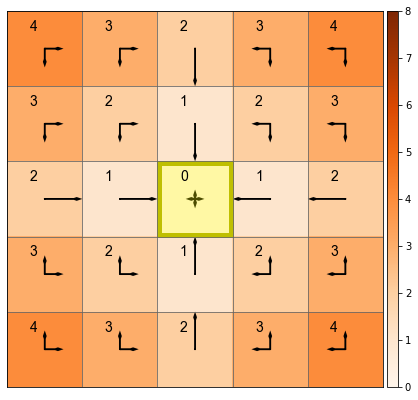

In [11]:
filename = "value-opt-{}.pdf".format(exp_desc)
di.plot_quiver_heatmap_var(env, -V_opt, pi_opt, label=True, clim=(0,8), filename=filename);

## Figure 1B: Decision Information plot.

In [12]:
ig = InformationToGoState(env, state_dist, theta)

beta: 100
state dist: Live


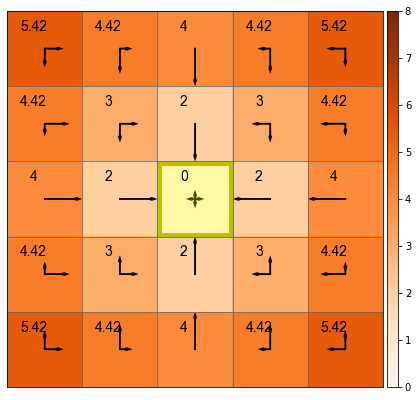

In [13]:
pi_opt, Z, F = ig.get_opt_policy_Z_free_vector(beta)
pi = Policy(env, pi_opt)
V, Q = pi.get_V_Q()
print ('beta: {}'.format(beta))
print ('state dist: {}'.format(ig.state_dist.name))
I = ig.get_information_to_go_given_policy(pi_opt)
filename = "info-{}.pdf".format(exp_desc)
di.plot_quiver_heatmap_var(env, I, pi.get_ndarray(), label=True, clim=(0,8), filename=filename);

## Figure 1C:  Free energy plot.

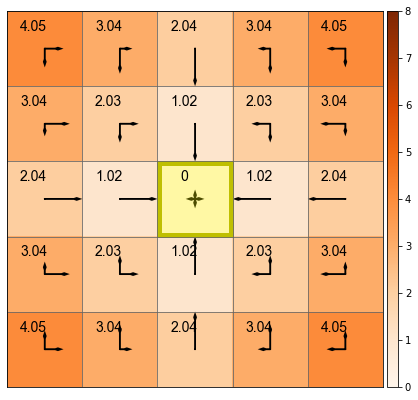

In [14]:
di.plot_quiver_heatmap_var(env, F, pi.get_ndarray(), label=True, clim=(0,8));

## Figure 1D:  Gridworld state numbering

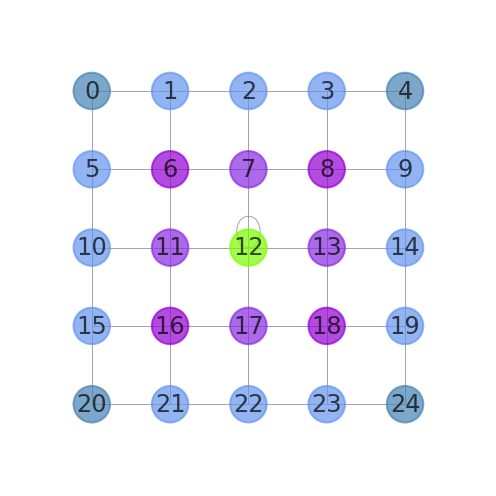

In [15]:
di.plot_graph(env.G, shape, node_colours=seq_colours, label=True, filename=f"graph-{exp_desc}.pdf");